In [32]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [33]:
URL = "https://www.amazon.com/s?k=gaming+monitor&crid=DLKV3AFRI1QZ&sprefix=gaming+monitor%2Caps%2C167&ref=nb_sb_noss_1"

In [34]:
# Headers for request
HEADERS = ({'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36', 'Accept-Language' : 'en-US, en; q = 0.5'})

In [35]:
# HTTP Request
webpage = requests.get(URL, headers = HEADERS)

In [36]:
type(webpage.content)

bytes

In [37]:
# Creating a soup object that contains all of the data on the page
soup = BeautifulSoup(webpage.content, 'html.parser')

In [38]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [39]:
# Fetch links as List of Tag Objects
links = soup.find_all("a", attrs = {'class' : 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [40]:
productLink = links[0].get('href')

In [41]:
productList = "https://amazon.com" + productLink

In [42]:
productList

'https://amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0138053N3D2RHVRM2EE&qualifier=1672905194&id=4172113325243280&widgetName=sp_atf&url=%2FKOORUI-FreeSync-Compatible-2560x1440-DisplayPort%2Fdp%2FB0B1B3VZLD%2Fref%3Dsr_1_1_sspa%3Fcrid%3DDLKV3AFRI1QZ%26keywords%3Dgaming%2Bmonitor%26qid%3D1672905194%26sprefix%3Dgaming%2Bmonitor%252Caps%252C167%26sr%3D8-1-spons%26psc%3D1'

In [43]:
newWebpage = requests.get(productList, headers = HEADERS)

In [44]:
newWebpage

<Response [200]>

In [45]:
newSoup = BeautifulSoup(newWebpage.content, 'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
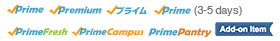

In [46]:
newSoup

In [47]:
# retrieving product title
newSoup.find("span", attrs = {"id" : "productTitle"}).text.strip()

'KOORUI 27 Inch QHD Gaming Monitor 144 Hz, VA, 1ms, DCI-P3 90% Color Gamut, FreeSync G-Sync Compatible, (2560x1440, HDMI, DisplayPort) Black'

In [48]:
# retrieving product price
newSoup.find("span", attrs = {"class" : "a-offscreen"}).text

'$189.99'

In [49]:
# retrieving product rating
newSoup.find("span", attrs = {"class" : "a-icon-alt"}).text

'4.3 out of 5 stars'

In [50]:
# retrieving number of customer reviews
newSoup.find("span", attrs = {"id" : "acrCustomerReviewText"}).string

'1,228 ratings'

In [51]:
# retrieving the savings percentage of the product
newSoup.find("span", attrs = {"class" : "a-size-large a-color-price savingPriceOverride aok-align-center reinventPriceSavingsPercentageMargin savingsPercentage"}).string

'-10%'